<a href="https://colab.research.google.com/github/jiayuanteng/Hands_on_ML2/blob/main/9_Unsupervised_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Oportimization problem is as follows. 

$min_{C_1, C_2, \cdots, C_k}∑_{k=1}^{K}\frac{1}{|C_k|}∑_{i, i'∈C_k}∑_{j=1}^{p}(x_{ij}-x_{i'j})^2$

Algorithm works as follows

1. Randomly assign centroids to K groups. 
2. Iterate until the cluster assignment stop changing: 

> For each of the K clusters, compute the cluster *centroid*. The *k*th cluster centroid is the vector of the *p* feature means for the observations in the *k*th cluster. \
> Assign each observation to the cluster whose centroid is closet (where *closest* is defined using Euclidean distance.

It is neccessary to run the algorithm several times to avoid suboptimal solutions. The *best* solution is determined by the model's *inertia*, which is the mean squared distance between each instance and its closest centroid. Note that *inertia* decreases as the number of clusters K increases.

K is a hyperparameter. One can use *silhouette diagram* and *silhouette score* to determine K. Silhouette score is the mean sihouette coefficient over all the instances.  

An instance's silhouette coefficient is $\frac{b-a}{max(a,b)}$ where a is the mean distance to the other instances in the same cluster and b is the *mean nearest-cluster distance*  that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster)
1. When silhouette coefficient is close to 1, the instance is well inside its own cluster and far from other clusters. 
2. When silhouette coefficient is close to 0, the instance is close to a cluster boundary. 
3. When silhouette coefficient is close to -1, the instance may have been assigned to the wrong cluster. 



In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
X, y = make_blobs(n_samples=2000, centers = blob_centers, cluster_std=blob_std, random_state = 7)

In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

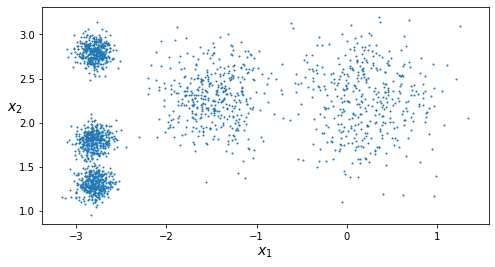

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

In [10]:
# Determine optimal k
kmeans_per_k = [KMeans(n_clusters = k, random_state=42).fit(X) for k in range(1,10)]

inertias = [model.inertia_ for model in kmeans_per_k]

## Elbow Method
The inertia drops very quickly as we increase k up to 4, but then it decreases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4 would be a good choice

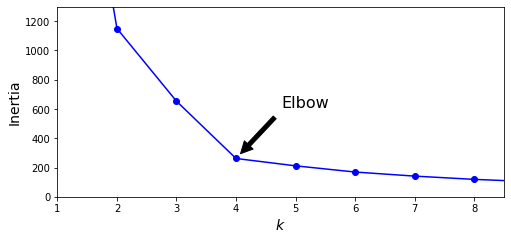

In [13]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

## Silhoutte diagram
Silhoutte score is more informative than Elbow method. 

Silhoutte diagram: Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhoutte coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhoutte coefficient. 

> when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]


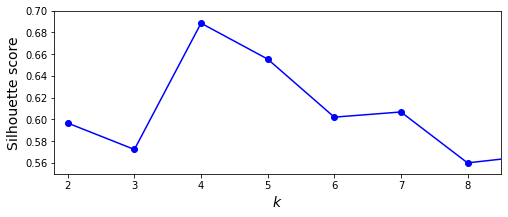

In [21]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

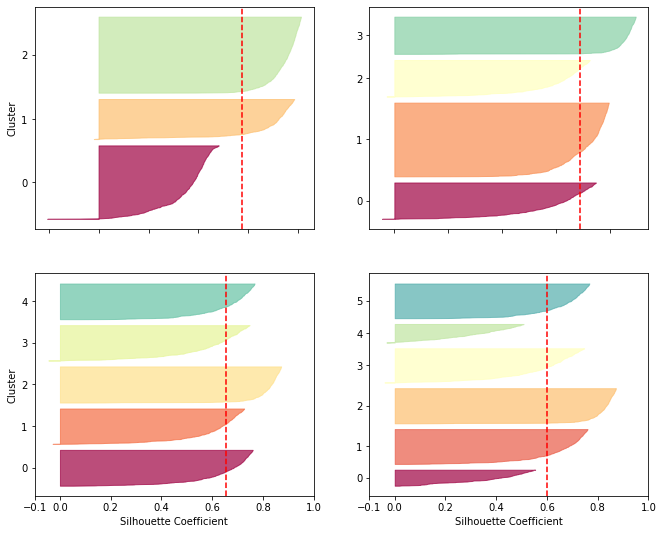

In [30]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize = (11, 9))

for k in (3, 4, 5, 6):
  plt.subplot(2, 2, k-2)

  y_pred = kmeans_per_k[k-1].labels_
  silhouette_coefficients = silhouette_samples(X, y_pred)

  padding = len(X)//30
  pos = padding
  ticks = []

  for i in range(k):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()

    color = mpl.cm.Spectral(i/k)

    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
  if k in (3, 5):
        plt.ylabel("Cluster")
    
  if k in (5, 6):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.xlabel("Silhouette Coefficient")
  else:
      plt.tick_params(labelbottom=False)

  plt.axvline(x = silhouette_scores[k-2], color = 'red', linestyle = "--")

In [33]:
## Run Kmeans using K = 5
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


In [34]:
# five centroids that the algorithm found: 
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [35]:
# hard clustering: assign each instance to a single cluster

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 1, 1], dtype=int32)

In [36]:
# soft clustering: give each instance a score per cluster. 
# the score can be the distance between the instance and the centroid.
kmeans.transform(X_new)

array([[2.81093633, 2.9042344 , 0.32995317, 1.49439034, 2.88633901],
       [5.80730058, 5.84739223, 2.80290755, 4.4759332 , 5.84236351],
       [1.21475352, 0.29040966, 3.29399768, 1.69136631, 1.71086031],
       [0.72581411, 0.36159148, 3.21806371, 1.54808703, 1.21567622]])

# Hierarchical clustering
Hierarchical clustering is an alternative approach. It results in an attractive tree-based representation of the observation, called a *dendrogram*.

*Agglomerative Clustering* performs a hierarchical clustering with a bottom up approach. Each observation starts in its own cluster, and clusters are successively merged togehter. The linkage that defines the dissimilarity between two groups of observations determines the metric used for the merge strategy.

In [38]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [39]:
iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)


In [41]:
model.children_.shape

(149, 2)

In [42]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

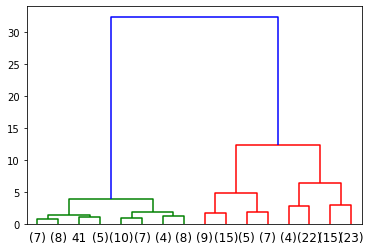

In [48]:
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)

In [47]:
model.distances_.shape

(149,)